Supervised Learning flow


In this project, I worked on a multi-class classification problem using a wine dataset. The goal was to predict the type of wine (class 0, 1, or 2) based on various chemical features, such as alcohol content, acidity, magnesium levels, and more. We used two datasets - a training set to build and tune the model, and a test set to evaluate its performance.The process included data preprocessing,feature engineering, training several models, and comparing them using cross-validation to find the best performing setup.

prompt to ai: I used chatgpt and copilot.
I used that for  explanations and clarifications in order to understand feature selection, how to handle imbalanced data, applying SMOTE, and understanding the differences between Gradient Boosting and SVM


Initial Preparations

In [1]:
import pandas as pd

train_data_frame = pd.read_csv("wine_train.csv") #here we are loading what we need
test_data_frame = pd.read_csv("wine_test.csv")

print("The first five rows in train test:")
display(train_data_frame.head())

print("\n The first five rows in test set:")
display(test_data_frame.head())

The first five rows in train test:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2



 The first five rows in test set:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


/tmp/ipython-input-1058442701.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=train_data_frame, palette="Set2")


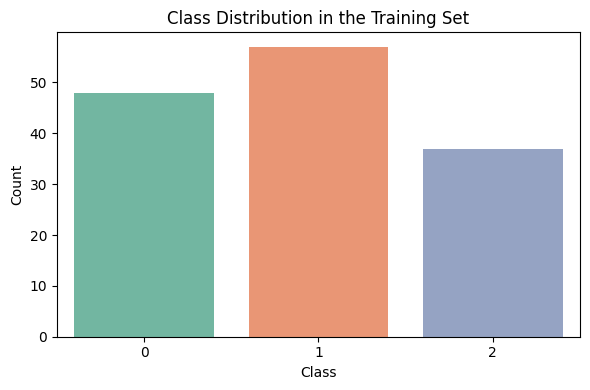

/tmp/ipython-input-1058442701.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data_frame, x="target", y="alcohol", palette="Set3")


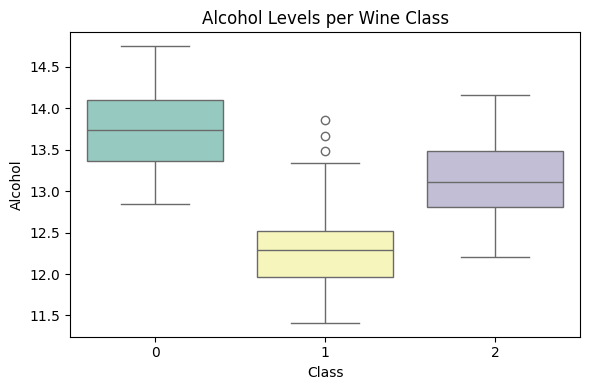

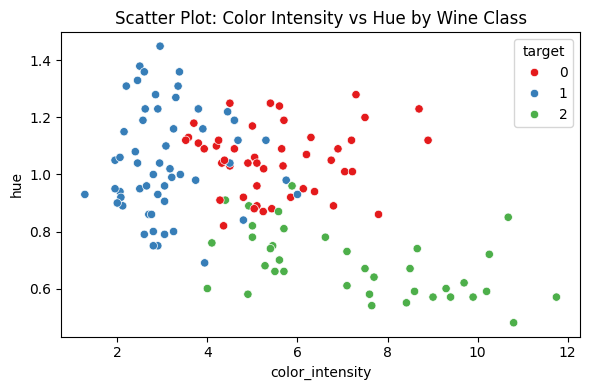

Summary Table : Feature Means per Class


target,0,1,2
alcohol,13.72,12.30,13.14
malic_acid,2.07,1.87,3.26
ash,2.48,2.22,2.42
alcalinity_of_ash,17.04,20.20,21.30
magnesium,106.83,93.96,100.22
total_phenols,2.85,2.30,1.65
flavanoids,3.00,2.10,0.79
nonflavanoid_phenols,0.29,0.34,0.43
proanthocyanins,1.88,1.58,1.11
color_intensity,5.55,3.14,7.27


In [2]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#we chose to show : class distribution, boxplot, scatterplot,table with means
# class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="target", data=train_data_frame, palette="Set2")
plt.title("Class Distribution in the Training Set")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=train_data_frame, x="target", y="alcohol", palette="Set3")
plt.title("Alcohol Levels per Wine Class")
plt.xlabel("Class")
plt.ylabel("Alcohol")
plt.tight_layout()
plt.show()

#Scatter Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=train_data_frame, x="color_intensity", y="hue", hue="target", palette="Set1")
plt.title("Scatter Plot: Color Intensity vs Hue by Wine Class")
plt.tight_layout()
plt.show()

# Table with means
summary = train_data_frame.groupby("target").mean(numeric_only=True).round(2).T
print("Summary Table : Feature Means per Class")
display(summary)

Experiments

In [3]:
%pip install scikit-learn
# PART A #

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

X = train_data_frame.drop(columns=["target"])
y = train_data_frame["target"]

# we are definng 3 different pipelines:
# Logistic regression with standardscaler
# Logistic regression with minmaxscaler
# Random forest with standardscaler
pipelines = {"logreg_standard": Pipeline([("scaler", StandardScaler()),("clf", LogisticRegression(max_iter=1000, random_state=42))])
             ,"logreg_minmax": Pipeline([("scaler", MinMaxScaler()),("clf", LogisticRegression(max_iter=1000, random_state=42))]),
             "rf_standard": Pipeline([("scaler", StandardScaler()),("clf", RandomForestClassifier(random_state=42))])}

# define a grid of hyperparameters for each pipeline
# we are testing different values of C for logistic regression,and different numbers of trees\depths for fandom forest
param_grids = {"logreg_standard": {"clf__C": [0.1, 1, 10],"clf__penalty": ["l2"],"clf__solver": ["lbfgs"]},
               "logreg_minmax": {"clf__C": [0.1, 1, 10],"clf__penalty": ["l2"],"clf__solver": ["lbfgs"]},
               "rf_standard": {"clf__n_estimators": [50, 100],"clf__max_depth": [None, 5, 10]}}


results = []
# Loop through each pipeline + grid and run a 5-fold cross-validation using macro-average F1
for name, pipe in pipelines.items():
    print(f"\nRunning GridSearch for: {name}")
    grid = GridSearchCV(estimator=pipe,param_grid=param_grids[name],
                        scoring="f1_macro",cv=5,n_jobs=-1,return_train_score=True)
    grid.fit(X, y)

    for mean, std, params in zip(grid.cv_results_["mean_test_score"],grid.cv_results_["std_test_score"],grid.cv_results_["params"]):
        results.append({"name": name,"feature_engineering": name.split("_")[1],"model": name.split("_")[0],"params": params,"mean_f1_macro": round(mean, 4),"std": round(std, 4)})

# sum results in table
results_data_frame = pd.DataFrame(results)
results_data_frame = results_data_frame.sort_values(by="mean_f1_macro", ascending=False).reset_index(drop=True)

print("Summary all combinations:")
display(results_data_frame)


# best result
best_result = results_data_frame.iloc[0]
print("the best result is")
print(best_result)


Running GridSearch for: logreg_standard

Running GridSearch for: logreg_minmax

Running GridSearch for: rf_standard
Summary all combinations:


,name,feature_engineering,model,params,mean_f1_macro,std
0,logreg_standard,standard,logreg,"{'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__so...",0.9787,0.0426
1,rf_standard,standard,rf,"{'clf__max_depth': 10, 'clf__n_estimators': 50}",0.9787,0.0278
2,rf_standard,standard,rf,"{'clf__max_depth': 5, 'clf__n_estimators': 50}",0.9787,0.0278
3,rf_standard,standard,rf,"{'clf__max_depth': None, 'clf__n_estimators': 50}",0.9787,0.0278
4,logreg_minmax,minmax,logreg,"{'clf__C': 10, 'clf__penalty': 'l2', 'clf__sol...",0.9717,0.0565
5,logreg_minmax,minmax,logreg,"{'clf__C': 1, 'clf__penalty': 'l2', 'clf__solv...",0.9717,0.0565
6,logreg_standard,standard,logreg,"{'clf__C': 1, 'clf__penalty': 'l2', 'clf__solv...",0.9714,0.0414
7,rf_standard,standard,rf,"{'clf__max_depth': None, 'clf__n_estimators': ...",0.9713,0.0410
8,rf_standard,standard,rf,"{'clf__max_depth': 5, 'clf__n_estimators': 100}",0.9713,0.0410
9,rf_standard,standard,rf,"{'clf__max_depth': 10, 'clf__n_estimators': 100}",0.9713,0.0410


the best result is
name                                                     logreg_standard
feature_engineering                                             standard
model                                                             logreg
params                 {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__so...
mean_f1_macro                                                     0.9787
std                                                               0.0426
Name: 0, dtype: object


In [4]:
# here we are defining pipeline with standardscaler and logistic regression
pipe = Pipeline([("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000, random_state=42))])

# we are defining the scalers we want to compare as part of the grid
scalers = [StandardScaler(), MinMaxScaler()]
# here we are building parameter grid with the scaler and logistic regression hyperparameters
param_grid = {
    "scaler": scalers,
    "clf__C": [0.1, 1, 10],
    "clf__penalty": ["l2"],
    "clf__solver": ["lbfgs"]
}
# here we are runing grid search with 5-fold CV and macro F1 as the evaluation metric
grid = GridSearchCV(estimator=pipe,param_grid=param_grid,scoring="f1_macro",
                    cv=5,n_jobs=-1,return_train_score=True)

grid.fit(X, y)# fit all combinations
#here we are collecting and structuring the results
results = []

for mean, std, params in zip(grid.cv_results_["mean_test_score"],
                              grid.cv_results_["std_test_score"],
                              grid.cv_results_["params"]):
    results.append({"scaler": type(params["scaler"]).__name__,
        "params": {k: v for k, v in params.items() if k != "scaler"},"mean_f1_macro": round(mean, 4),"std": round(std, 4)})
#display results in descending order of F1 score
results_data_frame = pd.DataFrame(results).sort_values(by="mean_f1_macro", ascending=False).reset_index(drop=True)
display(results_data_frame)

,scaler,params,mean_f1_macro,std
0,StandardScaler,"{'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__so...",0.9787,0.0426
1,MinMaxScaler,"{'clf__C': 1, 'clf__penalty': 'l2', 'clf__solv...",0.9717,0.0565
2,MinMaxScaler,"{'clf__C': 10, 'clf__penalty': 'l2', 'clf__sol...",0.9717,0.0565
3,StandardScaler,"{'clf__C': 1, 'clf__penalty': 'l2', 'clf__solv...",0.9714,0.0414
4,MinMaxScaler,"{'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__so...",0.9517,0.0435
5,StandardScaler,"{'clf__C': 10, 'clf__penalty': 'l2', 'clf__sol...",0.9508,0.0472


In [5]:
%pip install imbalanced-learn scikit-learn

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score, balanced_accuracy_score, precision_recall_fscore_support

#PART B BONUS
# Apply SMOTE for imbalanced data
X_result, y_result = SMOTE(random_state=42).fit_resample(X, y) # balance the data, creating new synthetic examples, improving the performance for classes that aren't well represented
scalers = [StandardScaler(), MinMaxScaler()]
k_best = min(10, X.shape[1])
feature_selector = SelectKBest(score_func=chi2, k=k_best) # preparing for pipeline
classifiers = {
    "gradient_boosting": GradientBoostingClassifier(random_state=42),
    "svm": SVC(probability=True, random_state=42)
}
# above we define algorithms as needed
param_grid = [
    {
        "scaler": scalers,
        "feature_selector": [feature_selector],
        "clf": [classifiers["gradient_boosting"]],
        "clf__n_estimators": [50, 100],
        "clf__learning_rate": [0.05, 0.1]
    },
    {
        "scaler": scalers,
        "feature_selector": [feature_selector],
        "clf": [classifiers["svm"]],
        "clf__C": [0.1, 1, 10],
        "clf__kernel": ["linear", "rbf"]
    }
]
# above we check parameters like number of trees, and parameters like kernel in svm
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("feature_selector", feature_selector),
    ("clf", GradientBoostingClassifier())
])
# above we define pipeline including scaler, feature selector and classifier
scoring = {
    "f1_macro": make_scorer(f1_score, average="macro"),
    "balanced_accuracy": make_scorer(balanced_accuracy_score)
}
# f1 is important when unbalanced classes, balanced accuracy is important as it's average recall by classes
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=scoring,
    refit="f1_macro",
    cv=5,
    n_jobs=-1,
    return_train_score=True
)
# doing very thorough searching of all combinations possible
grid.fit(X_result, y_result)
results = pd.DataFrame(grid.cv_results_)
display(results)
y_pred = grid.predict(X_result)
precision, recall, f1, _ = precision_recall_fscore_support(y_result, y_pred, average='macro')
print(f"Macro Precision: {precision:.3f}, Macro Recall: {recall:.3f}, Macro F1: {f1:.3f}")
print(f"Macro Precision: {precision:.3f}, Macro Recall: {recall:.3f}, Macro F1: {f1:.3f}")

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__learning_rate,param_clf__n_estimators,param_feature_selector,param_scaler,param_clf__C,...,mean_test_balanced_accuracy,std_test_balanced_accuracy,rank_test_balanced_accuracy,split0_train_balanced_accuracy,split1_train_balanced_accuracy,split2_train_balanced_accuracy,split3_train_balanced_accuracy,split4_train_balanced_accuracy,mean_train_balanced_accuracy,std_train_balanced_accuracy
0,0.020281,0.008761,0.000000,0.000000,GradientBoostingClassifier(random_state=42),0.05,50.0,SelectKBest(score_func=<function chi2 at 0x792...,StandardScaler(),NaN,...,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.897302,0.216803,0.024913,0.012257,GradientBoostingClassifier(random_state=42),0.05,50.0,SelectKBest(score_func=<function chi2 at 0x792...,MinMaxScaler(),NaN,...,0.954545,0.042526,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.023970,0.004661,0.000000,0.000000,GradientBoostingClassifier(random_state=42),0.05,100.0,SelectKBest(score_func=<function chi2 at 0x792...,StandardScaler(),NaN,...,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.414136,0.206621,0.021676,0.008103,GradientBoostingClassifier(random_state=42),0.05,100.0,SelectKBest(score_func=<function chi2 at 0x792...,MinMaxScaler(),NaN,...,0.954545,0.042526,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.015436,0.002447,0.000000,0.000000,GradientBoostingClassifier(random_state=42),0.10,50.0,SelectKBest(score_func=<function chi2 at 0x792...,StandardScaler(),NaN,...,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.697697,0.177099,0.025510,0.010313,GradientBoostingClassifier(random_state=42),0.10,50.0,SelectKBest(score_func=<function chi2 at 0x792...,MinMaxScaler(),NaN,...,0.954545,0.042526,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.017388,0.001139,0.000000,0.000000,GradientBoostingClassifier(random_state=42),0.10,100.0,SelectKBest(score_func=<function chi2 at 0x792...,StandardScaler(),NaN,...,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.801809,0.286226,0.027079,0.012505,GradientBoostingClassifier(random_state=42),0.10,100.0,SelectKBest(score_func=<function chi2 at 0x792...,MinMaxScaler(),NaN,...,0.948485,0.037476,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.027448,0.013557,0.000000,0.000000,"SVC(probability=True, random_state=42)",NaN,NaN,SelectKBest(score_func=<function chi2 at 0x792...,StandardScaler(),0.1,...,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.038034,0.020171,0.018663,0.010361,"SVC(probability=True, random_state=42)",NaN,NaN,SelectKBest(score_func=<function chi2 at 0x792...,MinMaxScaler(),0.1,...,0.942424,0.062724,10,0.955556,0.970692,0.963768,0.956522,0.963446,0.961997,0.005519


Macro Precision: 0.983, Macro Recall: 0.982, Macro F1: 0.982
Macro Precision: 0.983, Macro Recall: 0.982, Macro F1: 0.982


In [6]:
#comparison between random forest and gradient boosting classifiers
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

#define pipeline and hyperparameter
models_and_params = {
    "random_forest":{ "estimator": Pipeline([("scaler", StandardScaler()),("clf", RandomForestClassifier(random_state=42))]),
        "params": {"clf__n_estimators": [50, 100],"clf__max_depth": [5, 10]}},
    "gradient_boosting": {"estimator": Pipeline([("scaler", StandardScaler()),("clf", GradientBoostingClassifier(random_state=42))]),
                          "params": {"clf__n_estimators": [50, 100],"clf__learning_rate": [0.1, 0.3]}
    }
}

results = []
# here we are runing gridSearchCV for each model and parameter grid
for model_name, config in models_and_params.items():
    grid = GridSearchCV(
        estimator=config["estimator"],
        param_grid=config["params"],
        cv=5,
        scoring="f1_macro",
        n_jobs=-1,
        return_train_score=False
    )
    grid.fit(X, y)
    # collecting results
    for mean, std, params in zip(grid.cv_results_["mean_test_score"],
                                  grid.cv_results_["std_test_score"],
                                  grid.cv_results_["params"]):
        results.append({
            "model": model_name,
            "params": params,
            "mean_f1_macro": round(mean, 4),
            "std": round(std, 4)})

results_data_frame = pd.DataFrame(results).sort_values(by="mean_f1_macro", ascending=False).reset_index(drop=True)
display(results_data_frame)

,model,params,mean_f1_macro,std
0,random_forest,"{'clf__max_depth': 5, 'clf__n_estimators': 50}",0.9787,0.0278
1,random_forest,"{'clf__max_depth': 10, 'clf__n_estimators': 50}",0.9787,0.0278
2,random_forest,"{'clf__max_depth': 5, 'clf__n_estimators': 100}",0.9713,0.0410
3,random_forest,"{'clf__max_depth': 10, 'clf__n_estimators': 100}",0.9713,0.0410
4,gradient_boosting,"{'clf__learning_rate': 0.1, 'clf__n_estimators...",0.9382,0.0575
5,gradient_boosting,"{'clf__learning_rate': 0.1, 'clf__n_estimators...",0.9309,0.0557
6,gradient_boosting,"{'clf__learning_rate': 0.3, 'clf__n_estimators...",0.9307,0.0718
7,gradient_boosting,"{'clf__learning_rate': 0.3, 'clf__n_estimators...",0.9307,0.0718


Training

In [7]:
from sklearn.metrics import classification_report

# define final model pipeline based on the best combination found earlier
# this includes StandardScaler and Logistic Regression with the chosen hyperparameters
final_model_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        C=1,
        penalty="l2",
        solver="lbfgs",
        max_iter=1000,
        random_state=42
    ))
])
# prepare the training data
X = train_data_frame.drop(columns=["target"])
y = train_data_frame["target"]
#train the final model on the entire training set
final_model_pipeline.fit(X, y)
print("Final model trained on entire training set.\n")
#predict and show the first 5 predictions on the training data
print("Predictions the first five rows of train set:")
print("Input labels: ", y[:5].values)
print("Predicted labels:", final_model_pipeline.predict(X[:5]))
# evaluate the model using classification report on the full training data
y_pred = final_model_pipeline.predict(X)
print("\n classification report the entire training set:")
print(classification_report(y, y_pred))

Final model trained on entire training set.

Predictions the first five rows of train set:
Input labels:  [1 2 1 1 2]
Predicted labels: [1 2 1 1 2]

 classification report the entire training set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        37

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



Apply on test and show model performance estimation

In [8]:
from sklearn.metrics import classification_report, f1_score

X_test = test_data_frame.drop(columns=["target"])
y_test = test_data_frame["target"]

y_test_predict = final_model_pipeline.predict(X_test)

f1_macro = f1_score(y_test, y_test_predict, average="macro")

print("First 5 predictions on test set:")
print("Actual labels:   ", y_test[:5].values)
print("Predicted labels:", y_test_predict[:5])
print("\n Classification report on test set:")
print(classification_report(y_test, y_test_predict))
print(f"\n Final F1 Macro on test set: {round(f1_macro, 4)}")

First 5 predictions on test set:
Actual labels:    [2 0 2 1 2]
Predicted labels: [2 0 2 1 2]

 Classification report on test set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


 Final F1 Macro on test set: 1.0
